In [1]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score
from sklearn.preprocessing import LabelEncoder

import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns

import os

sns.set()

%matplotlib inline

C:\Users\sabbr\anaconda3\envs\ml_ds_nn_env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv('../Данные/out_w_time.csv', index_col=0)
#df = df.dropna()
#df.to_csv('out_w_time.csv')

In [3]:
print('hello')

hello


In [5]:
pd.value_counts(df['true'], normalize = True)

0    0.929484
1    0.070516
Name: true, dtype: float64

In [3]:
df.head()

,abiturient_id,add_time,name,true,eduform_id,fintype_id,ex_1,ex_2,ex_3,point_1,point_2,point_3,sum_bal,mean_spec_bal
1,202100004,2021-03-17,Боеприпасы и взрыватели,1,1,1,Математика,Физика,Русский язык,68,61,82.0,211.0,190.976266
2,202100004,2021-03-17,"Стрелково-пушечное, артиллерийское и ракетное ...",0,1,1,Математика,Физика,Русский язык,68,61,82.0,211.0,194.593900
3,202100004,2021-03-17,Технологические машины и оборудование,0,1,1,Математика,Физика,Русский язык,68,61,82.0,211.0,190.693548
4,202100004,2021-03-17,Машиностроение,0,1,1,Математика,Физика,Русский язык,68,61,82.0,211.0,201.486154
5,202100004,2021-03-17,Управление в технических системах,0,1,1,Математика,Физика,Русский язык,68,61,82.0,211.0,210.993363


In [30]:
y = df['true']
X = df.drop(['abiturient_id', 'add_time', 'true'], axis=1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [32]:
categorical_vals = [
    'name',
    'ex_1',
    'ex_2',
    'ex_3',
    'eduform_id',
    'fintype_id'
]

In [33]:
spec_id_enc = LabelEncoder()
predmet_1_enc = LabelEncoder()
predmet_2_enc = LabelEncoder()
predmet_3_enc = LabelEncoder()
edu_form_enc = LabelEncoder()
fin_type_enc = LabelEncoder()
encoders = [
    spec_id_enc,
    predmet_1_enc,
    predmet_2_enc,
    predmet_3_enc,
    edu_form_enc,
    fin_type_enc
]

In [34]:
for enc, val in zip(encoders, categorical_vals):
    enc.fit(X_train[val])
    X_train[val] = enc.transform(X_train[val])
    X_test[val] = enc.transform(X_test[val])

In [35]:
X_train.dtypes

name               int32
eduform_id         int64
fintype_id         int64
ex_1               int32
ex_2               int32
ex_3               int32
point_1            int64
point_2            int64
point_3          float64
sum_bal          float64
mean_spec_bal    float64
dtype: object

In [36]:
X_train.head()

,name,eduform_id,fintype_id,ex_1,ex_2,ex_3,point_1,point_2,point_3,sum_bal,mean_spec_bal
7059,17,0,0,1,4,1,62,72,84.0,218.0,204.261280
11865,0,0,0,1,4,1,62,48,66.0,176.0,196.606702
814,17,0,0,1,4,1,80,64,76.0,220.0,204.261280
20232,5,0,0,1,1,1,82,83,94.0,259.0,220.592959
442,7,0,0,1,4,1,68,57,67.0,192.0,213.168440


In [235]:
clf = xgb.XGBClassifier(max_depth=15, scale_pos_weight=99)

In [236]:
clf.fit(X_train, y_train)

C:\Users\alway\anaconda3\envs\ml_ds_nn_evn\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\alway\anaconda3\envs\ml_ds_nn_evn\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:39:56] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=15, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=99, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [237]:
y_pred = clf.predict(X_test)

In [238]:
clf.predict_proba(X_test)

array([[9.9996322e-01, 3.6746511e-05],
       [9.9891478e-01, 1.0852457e-03],
       [9.9763602e-01, 2.3639963e-03],
       ...,
       [9.4336671e-01, 5.6633301e-02],
       [9.9453557e-01, 5.4644365e-03],
       [9.4432342e-01, 5.5676557e-02]], dtype=float32)

In [239]:
cm = confusion_matrix(y_test, y_pred)

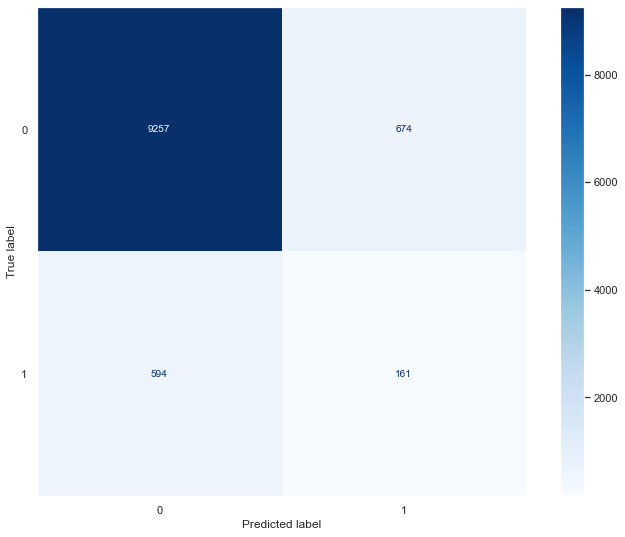

In [240]:
fig, ax = plt.subplots()
fig.set_size_inches((12, 9))
disp = ConfusionMatrixDisplay(cm)
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.grid(False)

In [241]:
accuracy_score(y_test, y_pred)

0.881340071121093

In [242]:
balanced_accuracy_score(y_test, y_pred)

0.5726883709516192

In [243]:
precision_score(y_test, y_pred)

0.19281437125748502

In [244]:
recall_score(y_test, y_pred)

0.21324503311258278

In [228]:
pd.value_counts(y_test)

0    9931
1     755
Name: true, dtype: int64

In [229]:
skf = StratifiedKFold(n_splits=5, shuffle=True)

In [230]:
cv_res = cross_validate(clf, X_train, y_train, cv=skf, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

C:\Users\alway\anaconda3\envs\ml_ds_nn_evn\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\alway\anaconda3\envs\ml_ds_nn_evn\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:39:23] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\alway\anaconda3\envs\ml_ds_nn_evn\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\alway\anaconda3\envs\ml_ds_nn_evn\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\alway\anaconda3\envs\ml_ds_nn_evn\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype in

[11:39:24] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\alway\anaconda3\envs\ml_ds_nn_evn\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\alway\anaconda3\envs\ml_ds_nn_evn\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\alway\anaconda3\envs\ml_ds_nn_evn\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype in

[11:39:25] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\alway\anaconda3\envs\ml_ds_nn_evn\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\alway\anaconda3\envs\ml_ds_nn_evn\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\alway\anaconda3\envs\ml_ds_nn_evn\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype in

[11:39:26] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\alway\anaconda3\envs\ml_ds_nn_evn\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\alway\anaconda3\envs\ml_ds_nn_evn\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\alway\anaconda3\envs\ml_ds_nn_evn\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype in

[11:39:27] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\alway\anaconda3\envs\ml_ds_nn_evn\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [232]:
cv_res['test_accuracy']

array([0.89611605, 0.88862892, 0.89798783, 0.89284043, 0.89284043])

In [233]:
cv_res['test_recall']

array([0.17218543, 0.24503311, 0.14666667, 0.15333333, 0.15333333])

In [234]:
cv_res['test_roc_auc']

array([0.71790947, 0.73155632, 0.71302131, 0.69953699, 0.711077  ])